# 1.0 - Importação das Bibliotecas

In [130]:
# intalação do imblearn
!pip3 install imblearn --user

In [131]:
# importar pandas
import pandas as pd

#importar rede neural MLPClassifier
from sklearn.neural_network import MLPClassifier

# importar lib para treino 
from sklearn.model_selection import train_test_split

In [132]:
# classe balance
from imblearn.over_sampling import SMOTE

In [133]:
# importa graficos
import matplotlib.pyplot as plt

#fazer os plots no proprio jupyter sem ter que ir para arquivo externo
%matplotlib inline

In [134]:
# verificar metrics para verificar acuracia, eficacia do algoritimo
from sklearn.metrics import accuracy_score

In [135]:
#matriz de confusao
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

In [171]:
#Metrica Precisão 
from sklearn.metrics import precision_score

In [174]:
#Metrica Recall - revogação 
from sklearn.metrics import recall_score

In [136]:
# metrica f1 score
from sklearn.metrics import f1_score

In [137]:
# importar ramdom 
from sklearn.ensemble import RandomForestClassifier

## 2.0 - Aquisição dos dados

In [138]:
df = pd.read_csv('df_processado.csv')

In [139]:
df.head()

,Unnamed: 0,age,salary,balance,day,campaign,pdays,previous,marital,targeted,default,housing,loan,contact,month,poutcome,job,education,response_rate
0,0,0.519481,0.833333,0.092259,0.133333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,4.0,2.0,0.0
1,1,0.337662,0.500000,0.073067,0.133333,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,9.0,1.0,0.0
2,2,0.194805,1.000000,0.072822,0.133333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,2.0,1.0,0.0
3,3,0.376623,0.166667,0.086476,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0,3.0,0.0
4,4,0.194805,0.000000,0.072812,0.133333,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,8.0,3.0,11.0,3.0,0.0


In [140]:
#apagar campo
df.drop('Unnamed: 0', axis=1, inplace=True)

In [141]:
df.head()

,age,salary,balance,day,campaign,pdays,previous,marital,targeted,default,housing,loan,contact,month,poutcome,job,education,response_rate
0,0.519481,0.833333,0.092259,0.133333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,4.0,2.0,0.0
1,0.337662,0.500000,0.073067,0.133333,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,9.0,1.0,0.0
2,0.194805,1.000000,0.072822,0.133333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,2.0,1.0,0.0
3,0.376623,0.166667,0.086476,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0,3.0,0.0
4,0.194805,0.000000,0.072812,0.133333,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,8.0,3.0,11.0,3.0,0.0


In [142]:
y = df.response_rate
x = df.drop('response_rate', axis=1)

In [143]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: response_rate, dtype: float64

In [144]:
x.head()

,age,salary,balance,day,campaign,pdays,previous,marital,targeted,default,housing,loan,contact,month,poutcome,job,education
0,0.519481,0.833333,0.092259,0.133333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,4.0,2.0
1,0.337662,0.500000,0.073067,0.133333,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,9.0,1.0
2,0.194805,1.000000,0.072822,0.133333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,2.0,1.0
3,0.376623,0.166667,0.086476,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,8.0,3.0,1.0,3.0
4,0.194805,0.000000,0.072812,0.133333,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,8.0,3.0,11.0,3.0


In [145]:
# separndo o dataset para treino e teste, sendo 30% sera teste. 
# O random state é para garantir que sempre que rodar mesma amostra.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #, random_state=42)

In [146]:
X_train.shape

(31577, 17)

In [147]:
X_test.shape

(13534, 17)

In [148]:
y_train.value_counts()

0.0    27908
1.0     3669
Name: response_rate, dtype: int64

In [149]:
y_test.value_counts()

0.0    11946
1.0     1588
Name: response_rate, dtype: int64

## 3.0- Balancear dados da treino

In [150]:
# isnulls 
X_train.isnull().sum()

age          0
salary       0
balance      0
day          0
campaign     0
pdays        0
previous     0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
job          0
education    0
dtype: int64

In [151]:
# isnulls 
y_train.isnull().sum()

0

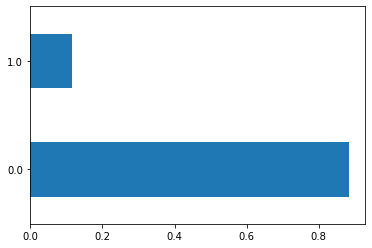

In [152]:
# verificar o grafico
y_train.value_counts(normalize=True).plot.barh()
plt.show()

In [153]:
# minimizar o desbalanceamento, assim, vamos balancear para que equalize a base para evitar excesso tendioso para o TREINO.
# aSSIM O ALGOritmo não seria tendioso ao treinar. Ja a base para rodar não precisaria.

sm = SMOTE()
X_res_train, y_res_train = sm.fit_resample(X_train, y_train)

# caso tiver ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
# sao valores null possiveis dentro do dataset, assim, tem que tratar.

### graficos

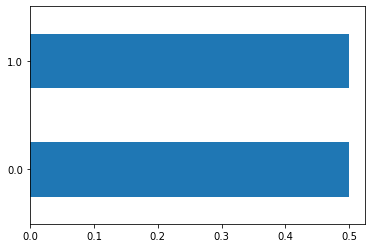

In [154]:
y_res.value_counts(normalize=True).plot.barh()
plt.show()

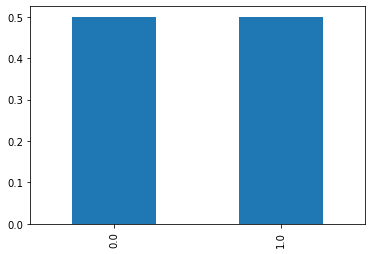

In [155]:
y_res.value_counts(normalize=True).plot.bar()
plt.show()

## 4.0 - Treinamento de algoritmo de classificação

In [156]:
# nosso defaul de interação é 200 interações, caso nao melhorar nas ultimas 10 ele para.
model = MLPClassifier(verbose=True, max_iter = 10) # bom usar max_iter 300
model = model.fit(X_res_train, y_res_train)

Iteration 1, loss = 0.62726586
Iteration 2, loss = 0.60874113
Iteration 3, loss = 0.60024040
Iteration 4, loss = 0.59321430
Iteration 5, loss = 0.58816982
Iteration 6, loss = 0.58333323
Iteration 7, loss = 0.57930115
Iteration 8, loss = 0.57592918
Iteration 9, loss = 0.57199140
Iteration 10, loss = 0.56900813


C:\Users\lindb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [157]:
# vamos fazer o Predict para ver se teve bons resultados
y_pred = model.predict(X_test)

In [158]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [159]:
score = accuracy_score(y_test, y_pred)

In [160]:
# varia de 0 a 1, sendo quanto maior melhor.
print('Accuracy Score:', score)

Accuracy Score: 0.7028964090438895


In [172]:
#TEstar PRecisao
prec = precision_score(y_test, y_pred)

In [173]:
# varia de 0 a 1, sendo quanto maior melhor.
print('Precision Score:', prec)

Precision Score: 0.4943946188340807


In [175]:
#TEstar Recall - Revogação
rec = precision_score(y_test, y_pred)

In [176]:
# varia de 0 a 1, sendo quanto maior melhor.
print('Precision Score:', rec)

Precision Score: 0.4943946188340807


In [177]:
#TEstar F1 Score
f1s = f1_score(y_test, y_pred)

In [178]:
# varia de 0 a 1, sendo quanto maior melhor.
print('F1 Score:', f1s)

F1 Score: 0.3556451612903226


## Verificar resultados 

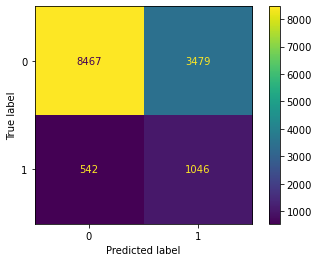

In [163]:
#Confusion Matrix
# o valor y é o real, e no x é o PRevisao. Quando comparar o perto do y é real, e o "par" com x é o erro.
cm = confusion_matrix(y_test, y_pred )
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot()

## 4.2 RandomForest

In [164]:
model = RandomForestClassifier()

In [165]:
model = model.fit(X_res_train, y_res_train)

In [166]:
# vamos fazer o Predict para ver se teve bons resultados
y_pred = model.predict(X_test)

In [167]:
score = accuracy_score(y_test, y_pred)

In [168]:
#TEstar F1 Score
f1s = f1_score(y_test, y_pred)

In [169]:
# varia de 0 a 1, sendo quanto maior melhor. 
print('Accuracy Score:', score)
print('F1 Score:', f1s)

Accuracy Score: 0.8819269986700162
F1 Score: 0.3556451612903226


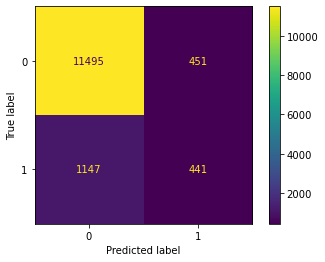

In [170]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred )
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot()

## Conclusão

BAse de dados complexa, e estes algoritmos não sao robustos para estes dados, pois muitos erros ainda.